#### Importing Libraries

In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re  # regular expression for words etc 
import string # to get some information from the string
import nltk # natural language tool kit 
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [78]:
#loading dataset
df=pd.read_csv('C:/Users/DELL/Desktop/tweets.csv',header=None,encoding='latin-1')
pd.set_option('display.max_columns',None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [79]:
df.columns = ['label', 'Id', 'Date', 'No Query','User','tweet']
df.head()

,label,Id,Date,No Query,User,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [80]:
df_new=df.drop(columns=['Date','No Query','User'],axis=1)
df_new

,label,Id,tweet
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1048571,4,1960186342,My GrandMa is making Dinenr with my Mum
1048572,4,1960186409,Mid-morning snack time... A bowl of cheese noo...
1048573,4,1960186429,@ShaDeLa same here say it like from the Termi...
1048574,4,1960186445,@DestinyHope92 im great thaanks wbuu?


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1048576 non-null  int64 
 1   Id        1048576 non-null  int64 
 2   Date      1048576 non-null  object
 3   No Query  1048576 non-null  object
 4   User      1048576 non-null  object
 5   tweet     1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


#### Preprocessing the data

In [82]:
def remove_extra_things(input_text,extra_thing):
    r=re.findall(extra_thing,input_text)
    for word in r:
        # re.sub(pattern, repl, string, count=0, flags=0)
        input_text=re.sub(extra_thing,"",input_text)
    return input_text

In [83]:
df_new['clean_tweet']=np.vectorize(remove_extra_things)(df_new['tweet'],"@[\w]*")


In [84]:
df_new.head()

,label,Id,tweet,clean_tweet
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - Awww, that's a bum..."
1,0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,0,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [85]:
#removing urls
df_new['clean_tweet']=np.vectorize(remove_extra_things)(df_new['clean_tweet'],"http\S+|www\S+|https\S+")

In [86]:
df_new.head()

,label,Id,tweet,clean_tweet
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",- A that's a bummer. You shoulda got David ...
1,0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
3,0,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [87]:
#removing special chaaracter,punctuations and numbers
df_new['clean_tweet']=df_new['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df_new.head()

,label,Id,tweet,clean_tweet
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",A that s a bummer You shoulda got David ...
1,0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to s...
3,0,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am...


In [88]:
#removing stopper words like is,a etc 
#df.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)
df_new['clean_tweet']=df_new['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3 ]))
df_new.head()

,label,Id,tweet,clean_tweet
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",that bummer shoulda David Carr Third
1,0,1467810672,is upset that he can't update his Facebook by ...,upset that update Facebook texting might resul...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,dived many times ball Managed save rest bounds
3,0,1467811184,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all....",behaving here because over there


In [89]:
#tokenize(individual words) the tweet
tokenized_tweet=df_new['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0          [that, bummer, shoulda, David, Carr, Third]
1    [upset, that, update, Facebook, texting, might...
2    [dived, many, times, ball, Managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4               [behaving, here, because, over, there]
Name: clean_tweet, dtype: object

In [91]:
#stemming 
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0          [that, bummer, shoulda, david, carr, third]
1    [upset, that, updat, facebook, text, might, re...
2    [dive, mani, time, ball, manag, save, rest, bo...
3               [whole, bodi, feel, itchi, like, fire]
4                   [behav, here, becaus, over, there]
Name: clean_tweet, dtype: object

In [92]:
#combining into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
    
df_new['clean_tweet']=tokenized_tweet
df_new.head()

,label,Id,tweet,clean_tweet
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",that bummer shoulda david carr third
1,0,1467810672,is upset that he can't update his Facebook by ...,upset that updat facebook text might result sc...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest bound
3,0,1467811184,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all....",behav here becaus over there


#### Exploratory data anaysis

In [44]:
#displaying/visualising the frequent words
all_words=' '.join([sentence for sentence in df_new['clean_tweet']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

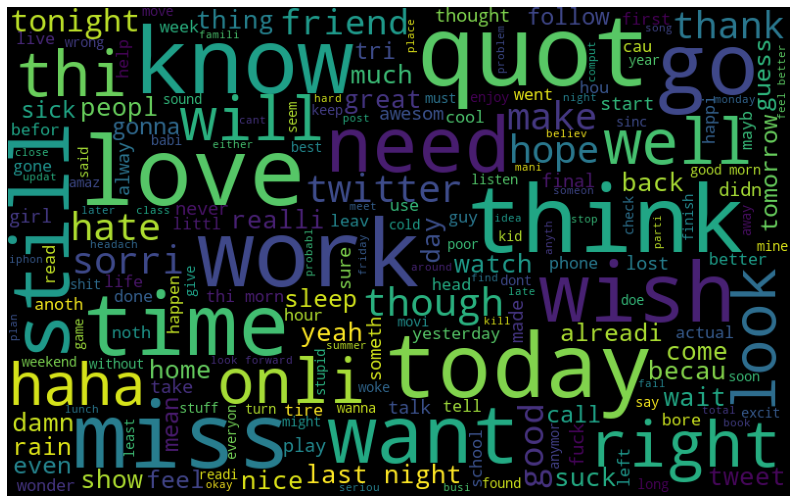

In [46]:
#plot the graph
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

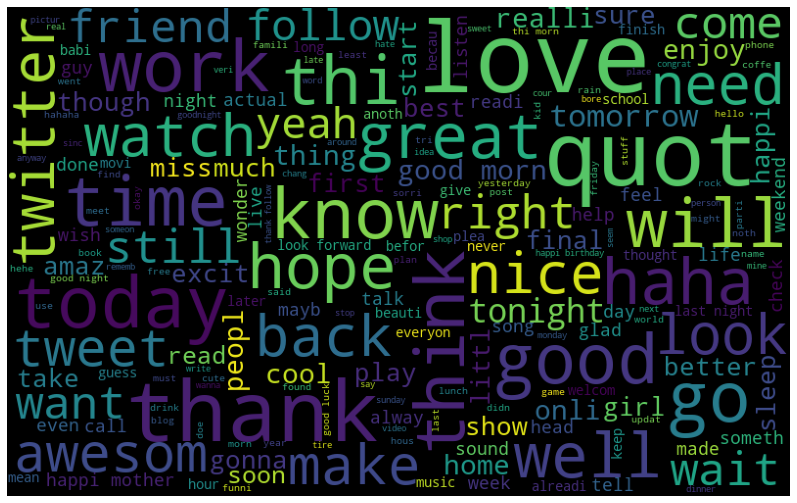

In [47]:
#frequent words visualization for posititve 
all_words=' '.join([sentence for sentence in df_new['clean_tweet'][df_new['label']==4]])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

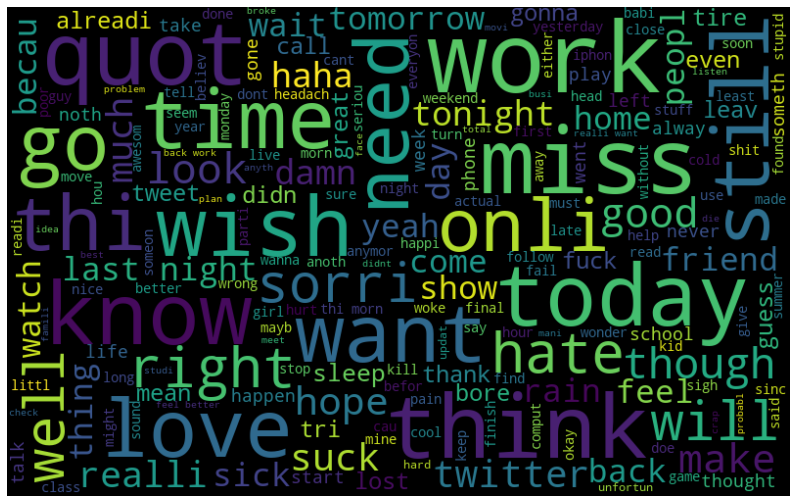

In [50]:
#frequent words visualization for negative
all_words=' '.join([sentence for sentence in df_new['clean_tweet'][df_new['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(16,9))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
#frequent words visualization for neutral
all_words=' '.join([sentence for sentence in df_new['clean_tweet'][df_new['label']==2]])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(16,9))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [52]:
#extracting hashtags
def extract_hashtag(tweets):
    hashtags=[]
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [56]:
#extract hashtags from positve tweets
ht_positive=extract_hashtag(df_new['clean_tweet'][df_new['label']==4])

#extract hashtags from negative tweets
ht_negative=extract_hashtag(df_new['clean_tweet'][df_new['label']==0])

#extract hashtags from neutral tweets
ht_neutral=extract_hashtag(df_new['clean_tweet'][df_new['label']==2])



In [57]:
#unnest list combining in a single list 
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])
ht_neutral=sum(ht_neutral,[])


In [59]:
ht_positive[:10]

['devun',
 'alexa',
 'japan',
 'skype',
 'explet',
 'musicmonday',
 'chuck',
 'nightcard',
 'paragon',
 'dog']

In [60]:
ht_negative[:10]

['itm',
 'therapyfail',
 'ttsc',
 'gayforpeavi',
 'fml',
 'camerafail',
 'travian',
 'wow',
 'art',
 'fail']

In [61]:
ht_neutral[:10]

[]

In [62]:
#dictionary from nltk to process the list 
freq_positive=nltk.FreqDist(ht_positive)
dataframe=pd.DataFrame({'Hashtag':list(freq_positive.keys()),
                       'Count':list(freq_positive.values())})
dataframe.head()

,Hashtag,Count
0,devun,1
1,alexa,1
2,japan,3
3,skype,2
4,explet,1


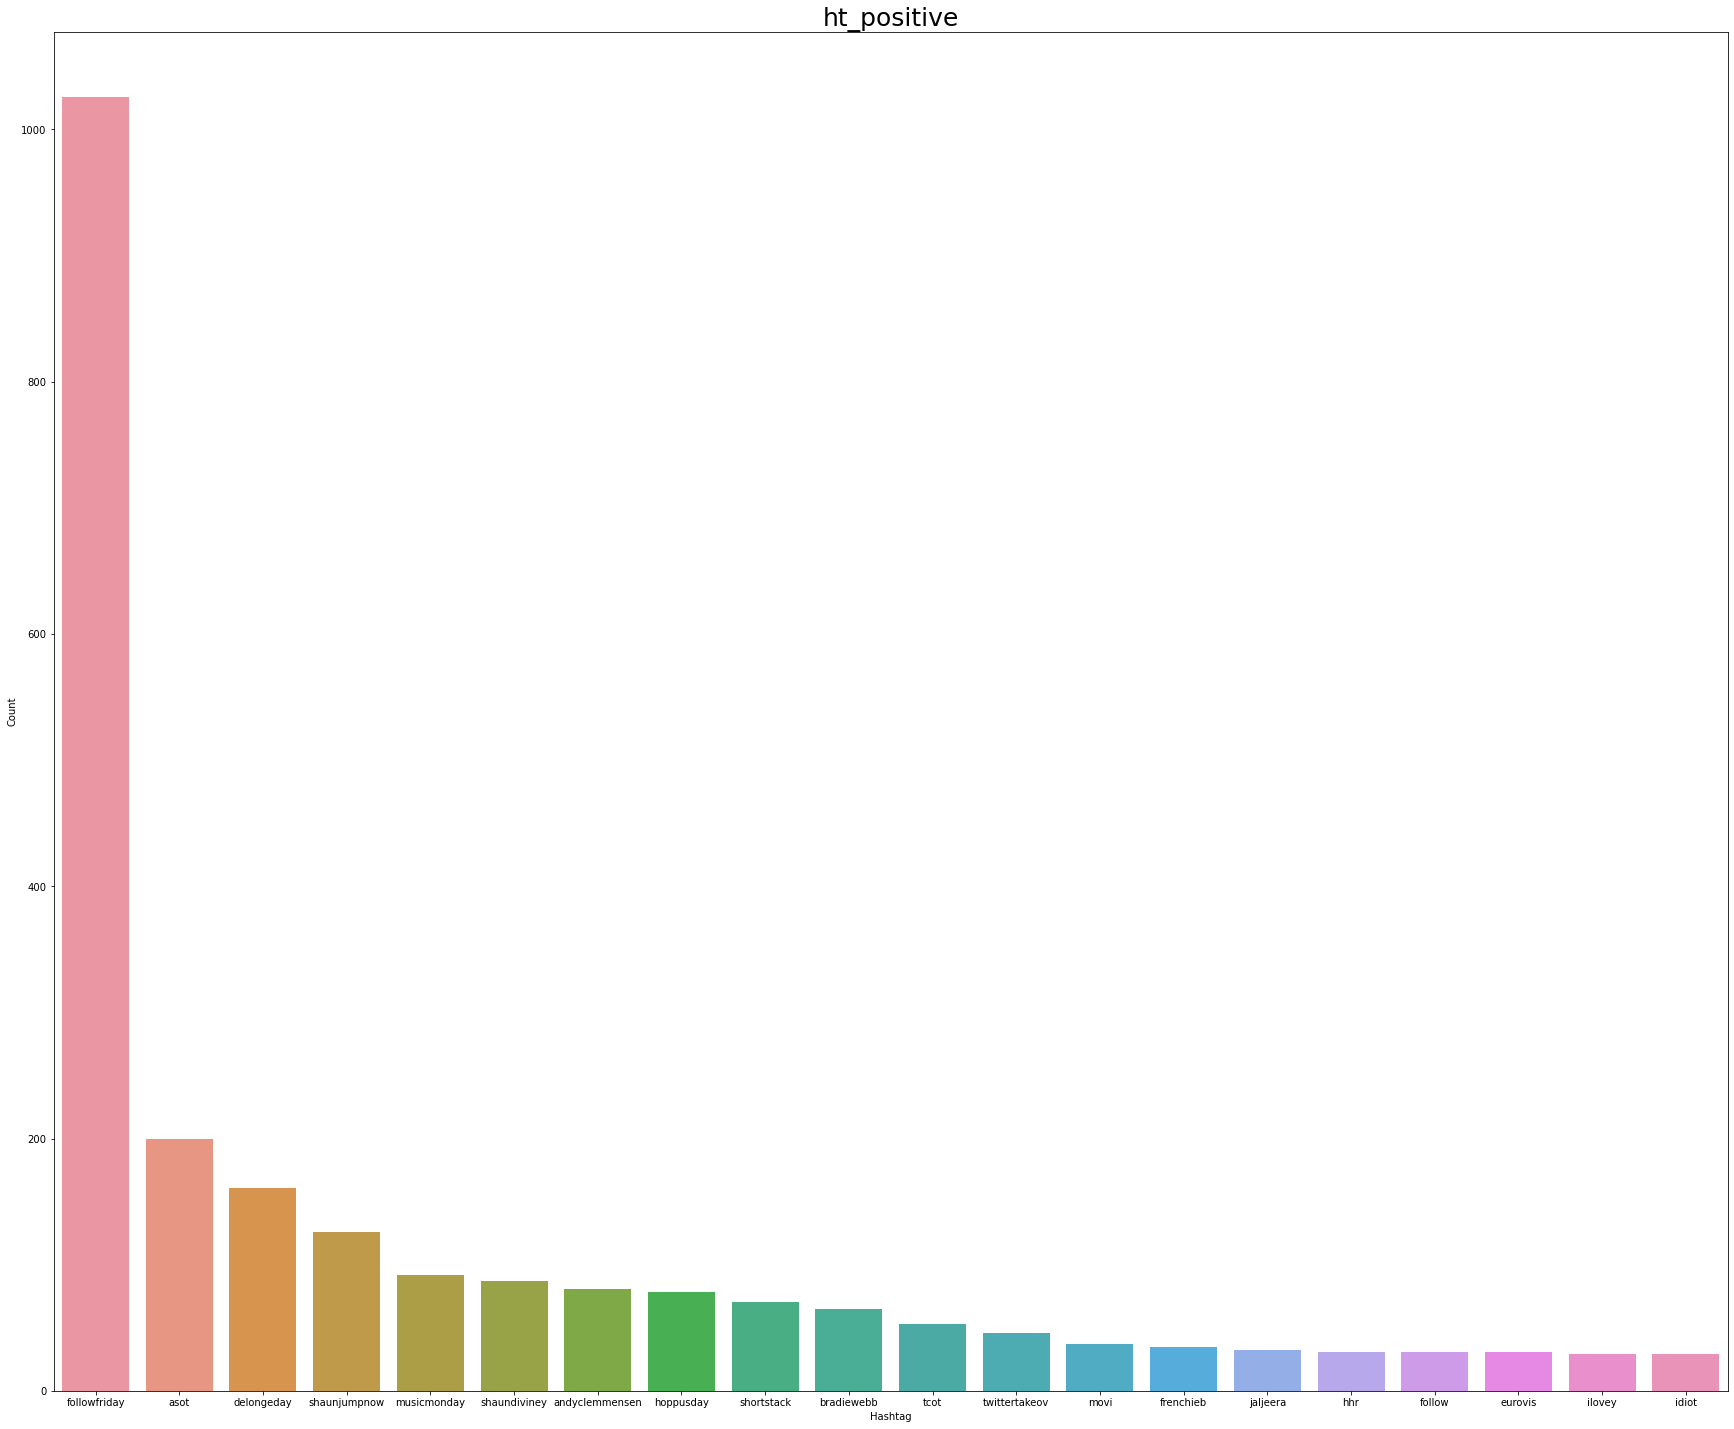

In [65]:
#selecting top 20 hashtags
import seaborn as sns
dataframe=dataframe.nlargest(columns='Count',n=20)
plt.figure(figsize=(30,25))
plt.title('ht_positive',fontsize=25)
sns.barplot(data=dataframe,x='Hashtag',y='Count')
plt.show()

In [66]:
#dictionary from nltk to process the list 
freq_negative=nltk.FreqDist(ht_negative)
dataframe=pd.DataFrame({'Hashtag':list(freq_negative.keys()),
                       'Count':list(freq_negative.values())})
dataframe.head()

,Hashtag,Count
0,itm,2
1,therapyfail,1
2,ttsc,1
3,gayforpeavi,1
4,fml,24


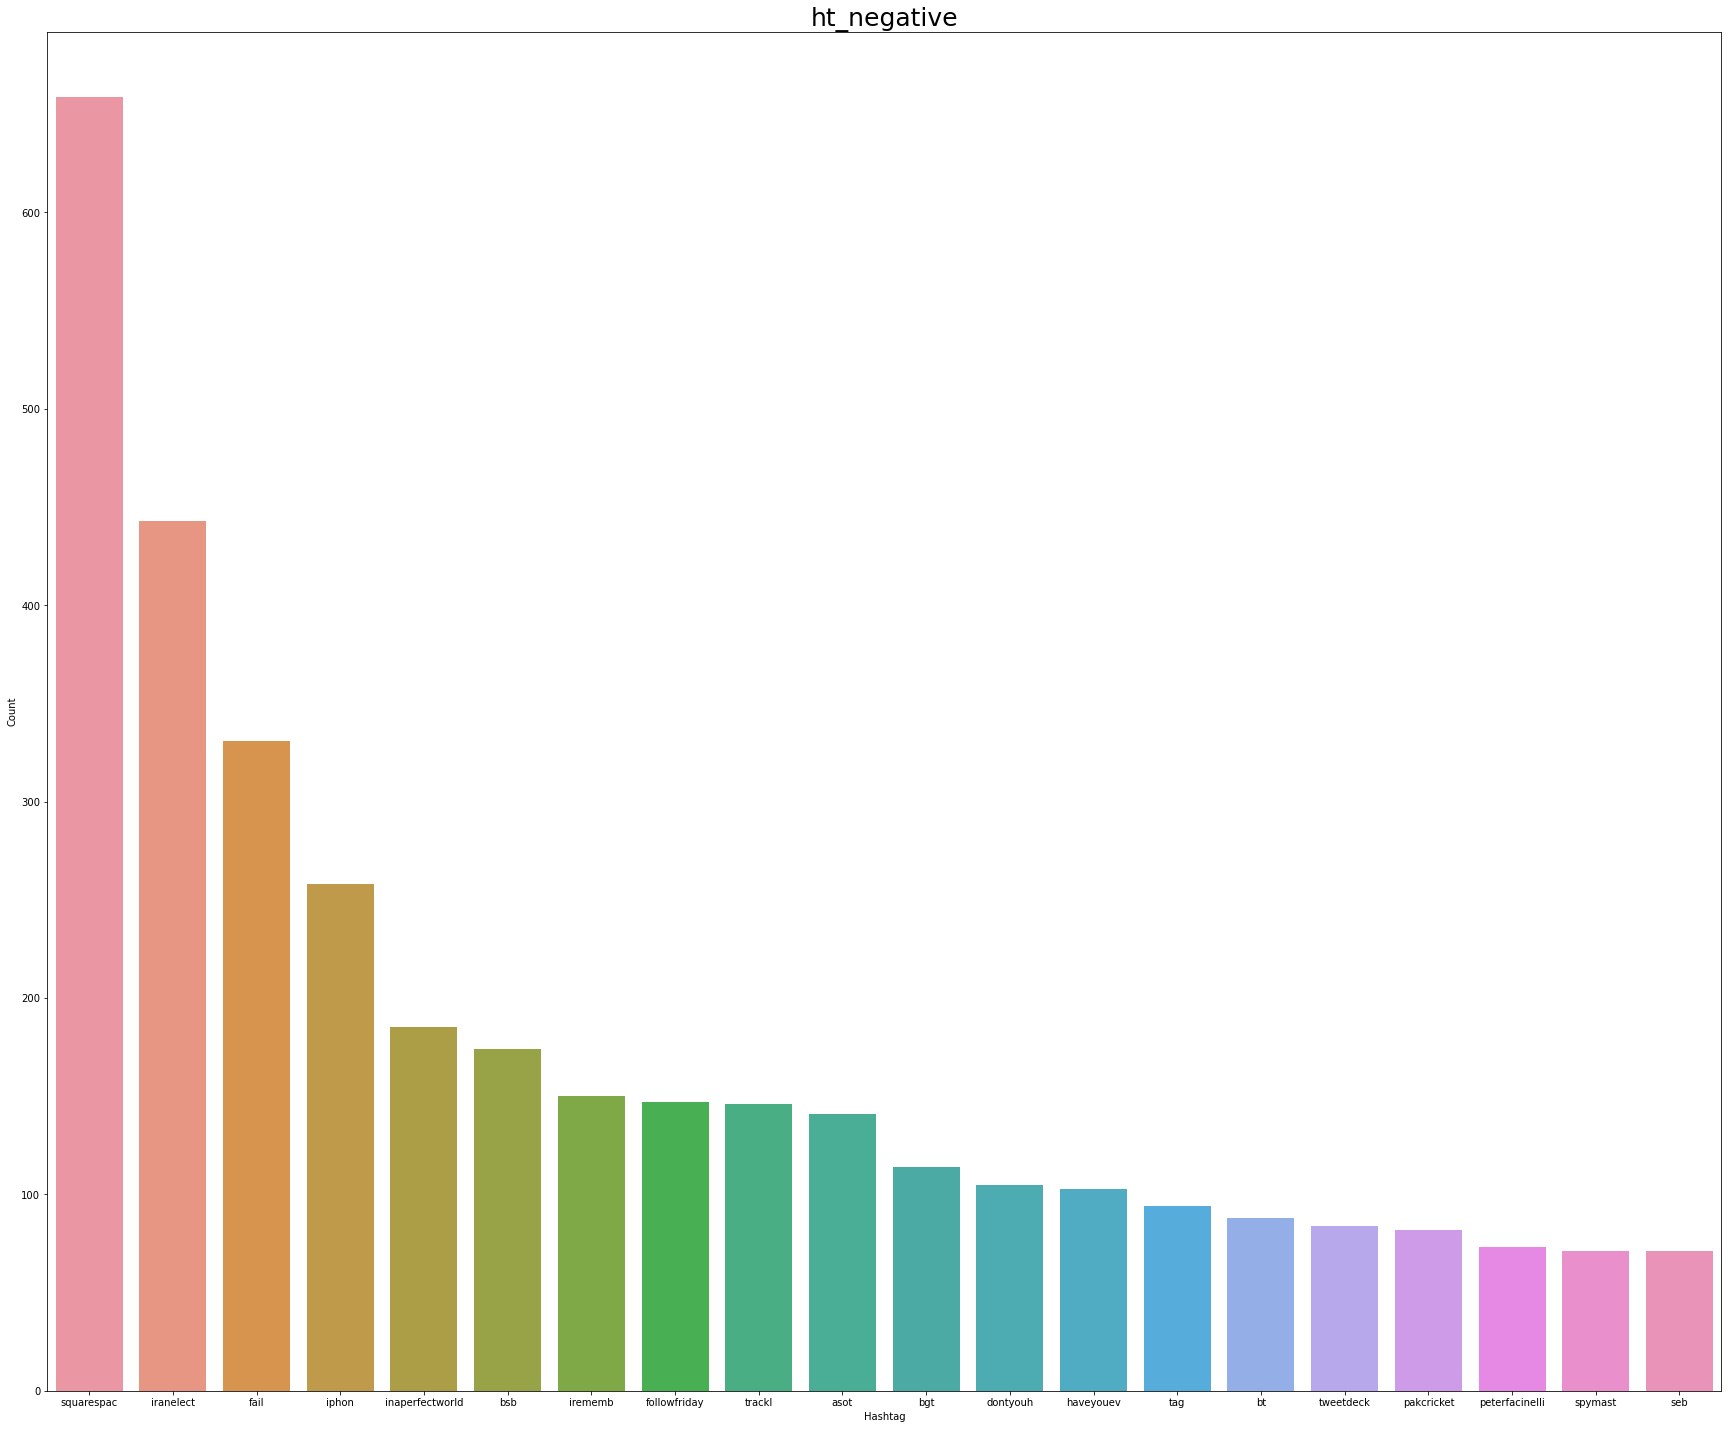

In [67]:
#selecting top 20 hashtags
import seaborn as sns
dataframe=dataframe.nlargest(columns='Count',n=20)
plt.figure(figsize=(30,25))
plt.title('ht_negative',fontsize=25)
sns.barplot(data=dataframe,x='Hashtag',y='Count')
plt.show()

#### Feature Extraction

In [68]:
#input split
from sklearn.feature_extraction.text import CountVectorizer #it will generate a matrix with words and its occurances 
bag_of_words_vectorize=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bag_of_words=bag_of_words_vectorize.fit_transform(df_new['clean_tweet'])


In [69]:
bag_of_words

<1048576x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3968918 stored elements in Compressed Sparse Row format>

#### Model Training 

In [70]:
#slpitting into training ang test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bag_of_words,df['label'],random_state=12,test_size=0.2)

In [71]:
#model traing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [72]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [75]:
#testing
prediction=model.predict(x_test)

#### Accuracy

In [74]:
accuracy_score(y_test,prediction)

0.8048980526044747